In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import ttest_ind

In [28]:
# Load the dataset
cleaned_df  = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

In [33]:
cleaned_df.dtypes

Age                                       float64
Gender                                     object
State                                      object
Store_Location                             object
Income_Level                               object
Date_of_First_Purchase                     object
Last_Purchase_Date                         object
Type_of_Eyewear                            object
Brand                                      object
Model                                      object
Price                                     float64
Discount_Amount                           float64
Last_Interaction_Type                      object
Mode_of_Purchase                           object
Return_Or_Exchange_History                 object
Customer_Support_Interactions             float64
Social_Media_Engagement                   float64
Referral_Source                            object
Churn                                      object
Customer_Satisfaction                     float64


In [34]:
cleaned_df['Date_of_First_Purchase'] = pd.to_datetime(cleaned_df['Date_of_First_Purchase'])
cleaned_df['Last_Purchase_Date'] = pd.to_datetime(cleaned_df['Last_Purchase_Date'])

In [35]:
from Central_Tendancy import CT

In [36]:
 ct = CT()

In [37]:
# Use the methods of CT
quan, qual, dates = ct.QuanQualDates(cleaned_df)
print("Quantitative columns:", quan)
print("Qualitative columns:", qual)
print("Dates columns:", dates)



Quantitative columns: ['Age', 'Price', 'Discount_Amount', 'Customer_Support_Interactions', 'Social_Media_Engagement', 'Customer_Satisfaction', 'Purchase_Frequency', 'Complaint_History', 'Product_Return_Rate', 'Cross_Sell_or_Upsell_Success_Rate', 'Lifetime_Value', 'Average_Order_Value', 'Sales_Driver_Index', 'Number_of_Product_Categories_Purchased']
Qualitative columns: ['Gender', 'State', 'Store_Location', 'Income_Level', 'Type_of_Eyewear', 'Brand', 'Model', 'Last_Interaction_Type', 'Mode_of_Purchase', 'Return_Or_Exchange_History', 'Referral_Source', 'Churn', 'Product_Usage', 'Loyalty_Program_Participation', 'Engagement_with_Promotions', 'Subscription_Status', 'Customer_Segmentation', 'Purchase_Channel_Loyalty', 'Feedback']
Dates columns: ['Date_of_First_Purchase', 'Last_Purchase_Date']


In [38]:
descriptive = ct.compute_descriptive_statistics(cleaned_df, quan)
print("\nDescriptive Statistics:")
descriptive


Descriptive Statistics:


,Age,Price,Discount_Amount,Customer_Support_Interactions,Social_Media_Engagement,Customer_Satisfaction,Purchase_Frequency,Complaint_History,Product_Return_Rate,Cross_Sell_or_Upsell_Success_Rate,Lifetime_Value,Average_Order_Value,Sales_Driver_Index,Number_of_Product_Categories_Purchased
Mean,46.328237,371.429286,26.770835,5.287144,51.058768,5.13056,9.104256,4.310288,0.523057,0.516596,5827.641007,543.212085,0.521707,2.553911
Median,47.0,343.19,26.45,5.0,52.0,5.32,9.0,4.0,0.53,0.53,6041.575,533.67,0.53,2.0
Mode,68.0,230.5,10.95,7.0,80.0,6.11,4.0,1.0,0.91,0.81,6900.18,239.31,0.94,2.0
Q1:25%,33.0,231.0825,14.6625,3.0,26.0,2.95,4.0,2.0,0.27,0.26,3425.025617,285.39096,0.26,2.0
Q2:50%,47.0,343.19,26.45,5.0,52.0,5.32,9.0,4.0,0.53,0.53,6041.575,533.67,0.53,2.0
Q3:75%,60.0,476.0575,38.27,8.0,79.0,7.21,14.0,7.0,0.79,0.79,8105.482705,782.857987,0.79,3.0
99%,73.0,797.6396,49.55,12.0,98.0,9.86,19.0,9.0,0.99,0.99,11137.131847,1043.157158,0.99,4.0
Q4:100%,79.0,1017.752005,50.0,13.0,99.0,10.0,19.0,9.0,1.0,1.0,12462.90862,1121.194363,1.0,4.0
IQR,27.0,244.975,23.6075,5.0,53.0,4.26,10.0,5.0,0.52,0.53,4680.457088,497.467027,0.53,1.0
1.5rule,40.5,367.4625,35.41125,7.5,79.5,6.39,15.0,7.5,0.78,0.795,7020.685632,746.200541,0.795,1.5


In [9]:
freqTable=ct.freqTable("Price", cleaned_df)
freqTable

,Unique_values,Frequency,Relative_Frequency,Cumulative
0,230.500000,4722,0.049652,0.049652
1,279.540000,8,0.000084,0.049736
2,493.050000,8,0.000084,0.049820
3,222.900000,7,0.000074,0.049894
4,211.500000,7,0.000074,0.049967
...,...,...,...,...
64252,782.960000,1,0.000011,0.999958
64253,323.620000,1,0.000011,0.999968
64254,495.551204,1,0.000011,0.999979
64255,303.895401,1,0.000011,0.999989


In [9]:
lesser, greater = ct.find_outlier(descriptive, quan)
print("\nColumns with outliers:")
print("Lesser:", lesser)
print("Greater:", greater)


Columns with outliers:
Lesser: []
Greater: ['Price']


In [10]:
df = ct.replace_outlier(descriptive, quan, cleaned_df)
print("\nDataFrame after outlier replacement:")
df.head()


DataFrame after outlier replacement:


,Age,Gender,State,Store_Location,Income_Level,Date_of_First_Purchase,Last_Purchase_Date,Type_of_Eyewear,Brand,Model,...,Customer_Segmentation,Complaint_History,Product_Return_Rate,Cross_Sell_or_Upsell_Success_Rate,Purchase_Channel_Loyalty,Lifetime_Value,Average_Order_Value,Feedback,Sales_Driver_Index,Number_of_Product_Categories_Purchased
0,62.0,Female,GA,Target Optical,High,2019-08-25,2022-09-15,Safety Eyewear,Gucci,Gucci 0140,...,Inactive,5.0,0.46,0.27,Low,1738.96815,233.902744,Positive,0.51,3.0
1,21.0,Female,NV,LensCrafters,Medium,2015-10-13,2023-05-05,Reading Glasses,Michael Kors,MK2056,...,Inactive,9.0,0.55,0.79,High,9799.82000,833.200000,Positive,0.74,2.0
2,28.0,Male,NY,LensCrafters,Medium,2018-03-26,2023-09-23,Reading Glasses,Oakley,VE2160,...,Inactive,0.0,0.12,0.03,Medium,7027.47000,727.390000,Positive,0.94,1.0
3,21.0,Female,MA,Pearle Vision,High,2020-11-10,2021-06-29,Reading Glasses,Persol,718,...,Loyal,1.0,0.59,0.01,Medium,6900.18000,772.635501,Negative,0.99,2.0
4,57.0,Male,WA,LensCrafters,Low,2019-11-14,2023-02-24,Luxury Eyewear,Persol,713,...,High-value,1.0,0.86,0.74,Medium,10923.30609,465.561789,Positive,0.68,2.0


In [11]:
descriptive = ct.compute_descriptive_statistics(cleaned_df, quan)
print("\nDescriptive Statistics:")
descriptive


Descriptive Statistics:


,Age,Price,Discount_Amount,Customer_Support_Interactions,Social_Media_Engagement,Customer_Satisfaction,Purchase_Frequency,Complaint_History,Product_Return_Rate,Cross_Sell_or_Upsell_Success_Rate,Lifetime_Value,Average_Order_Value,Sales_Driver_Index,Number_of_Product_Categories_Purchased
Mean,46.328237,370.940773,26.770835,5.287144,51.058768,5.13056,9.104256,4.310288,0.523057,0.516596,5827.641007,543.212085,0.521707,2.553911
Median,47.0,343.19,26.45,5.0,52.0,5.32,9.0,4.0,0.53,0.53,6041.575,533.67,0.53,2.0
Mode,68.0,230.5,10.95,7.0,80.0,6.11,4.0,1.0,0.91,0.81,6900.18,239.31,0.94,2.0
Q1:25%,33.0,231.0825,14.6625,3.0,26.0,2.95,4.0,2.0,0.27,0.26,3425.025617,285.39096,0.26,2.0
Q2:50%,47.0,343.19,26.45,5.0,52.0,5.32,9.0,4.0,0.53,0.53,6041.575,533.67,0.53,2.0
Q3:75%,60.0,476.0575,38.27,8.0,79.0,7.21,14.0,7.0,0.79,0.79,8105.482705,782.857987,0.79,3.0
99%,73.0,797.6396,49.55,12.0,98.0,9.86,19.0,9.0,0.99,0.99,11137.131847,1043.157158,0.99,4.0
Q4:100%,79.0,843.52,50.0,13.0,99.0,10.0,19.0,9.0,1.0,1.0,12462.90862,1121.194363,1.0,4.0
IQR,27.0,244.975,23.6075,5.0,53.0,4.26,10.0,5.0,0.52,0.53,4680.457088,497.467027,0.53,1.0
1.5rule,40.5,367.4625,35.41125,7.5,79.5,6.39,15.0,7.5,0.78,0.795,7020.685632,746.200541,0.795,1.5


In [13]:
# ANOVA Test
anova_results = {}
for col in quan:
    model = ols(f'{col} ~ C(Churn)', data=cleaned_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table
    print(f'ANOVA Test for {col}:')
    print(anova_table)

ANOVA Test for Age:
                sum_sq       df            F  PR(>F)
C(Churn)  4.789062e+05      1.0  1990.865996     0.0
Residual  2.287647e+07  95100.0          NaN     NaN
ANOVA Test for Price:
                sum_sq       df           F        PR(>F)
C(Churn)  6.391019e+06      1.0  239.307582  6.478903e-54
Residual  2.539769e+09  95100.0         NaN           NaN
ANOVA Test for Discount_Amount:
                sum_sq       df         F    PR(>F)
C(Churn)  7.161540e+01      1.0  0.414005  0.519945
Residual  1.645059e+07  95100.0       NaN       NaN
ANOVA Test for Customer_Support_Interactions:
                 sum_sq       df             F  PR(>F)
C(Churn)  107240.359412      1.0  12829.758049     0.0
Residual  794914.303245  95100.0           NaN     NaN
ANOVA Test for Social_Media_Engagement:
                sum_sq       df         F    PR(>F)
C(Churn)  7.873021e+01      1.0  0.093951  0.759213
Residual  7.969287e+07  95100.0       NaN       NaN
ANOVA Test for Customer_Satisf

Age: Significantly impacts churn (P-value: 0.0).

Price: Significantly impacts churn (P-value: 6.478903e-54).

Customer Support Interactions: Significantly impacts churn (P-value: 0.0).

Customer Satisfaction: Significantly impacts churn (P-value: 0.0).

Purchase Frequency: Significantly impacts churn (P-value: 0.0).

Product Return Rate: Significantly impacts churn (P-value: 0.046341).

Lifetime Value: Significantly impacts churn (P-value: 0.0).

Average Order Value: Significantly impacts churn (P-value: 1.002036e-108).

Number of Product Categories Purchased: Significantly impacts churn (P-value: 0.0).

In [12]:
# T-test for Age Difference
churn_age = cleaned_df[cleaned_df['Churn'] == 1]['Age']
non_churn_age = cleaned_df[cleaned_df['Churn'] == 0]['Age']

In [13]:
t_stat, p_val = stats.ttest_ind(churn_age, non_churn_age)
print(f'T-test for age difference: t-statistic = {t_stat}, p-value = {p_val}')

T-test for age difference: t-statistic = nan, p-value = nan


In [14]:
contingency_table = pd.crosstab(cleaned_df['Gender'], cleaned_df['Churn'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
print(f'Chi-Square Test for Gender and Churn: chi2_stat = {chi2_stat}, p-value = {p_val}')

Chi-Square Test for Gender and Churn: chi2_stat = 0.23126304328236885, p-value = 0.6305888783630013


In [15]:
qual

['Gender',
 'State',
 'Store_Location',
 'Income_Level',
 'Type_of_Eyewear',
 'Brand',
 'Model',
 'Last_Interaction_Type',
 'Mode_of_Purchase',
 'Return_Or_Exchange_History',
 'Referral_Source',
 'Churn',
 'Product_Usage',
 'Loyalty_Program_Participation',
 'Engagement_with_Promotions',
 'Subscription_Status',
 'Customer_Segmentation',
 'Purchase_Channel_Loyalty',
 'Feedback']

In [48]:
# Convert categorical variables to dummy variables
cleaned_df = pd.get_dummies(cleaned_df, columns=[col for col in qual if col in cleaned_df.columns], drop_first=True)

# List the columns after conversion to verify
print(cleaned_df.columns)

Index(['Age', 'Date_of_First_Purchase', 'Last_Purchase_Date', 'Price',
       'Discount_Amount', 'Customer_Support_Interactions',
       'Social_Media_Engagement', 'Customer_Satisfaction',
       'Purchase_Frequency', 'Complaint_History',
       ...
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium',
       'Subscription_Status_Subscribed', 'Customer_Segmentation_High-value',
       'Customer_Segmentation_Inactive', 'Customer_Segmentation_Loyal',
       'Purchase_Channel_Loyalty_Low', 'Purchase_Channel_Loyalty_Medium',
       'Feedback_Neutral', 'Feedback_Positive'],
      dtype='object', length=121)


In [21]:
cat_df['Churn_Yes']

0        0
1        1
2        1
3        0
4        0
        ..
95097    1
95098    0
95099    1
95100    0
95101    0
Name: Churn_Yes, Length: 95102, dtype: uint8

In [17]:
cat_df.columns

Index(['Age', 'Date_of_First_Purchase', 'Last_Purchase_Date', 'Price',
       'Discount_Amount', 'Customer_Support_Interactions',
       'Social_Media_Engagement', 'Customer_Satisfaction',
       'Purchase_Frequency', 'Complaint_History',
       ...
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium',
       'Subscription_Status_Subscribed', 'Customer_Segmentation_High-value',
       'Customer_Segmentation_Inactive', 'Customer_Segmentation_Loyal',
       'Purchase_Channel_Loyalty_Low', 'Purchase_Channel_Loyalty_Medium',
       'Feedback_Neutral', 'Feedback_Positive'],
      dtype='object', length=121)

In [19]:
cleaned_df[quan].columns

Index(['Age', 'Price', 'Discount_Amount', 'Customer_Support_Interactions',
       'Social_Media_Engagement', 'Customer_Satisfaction',
       'Purchase_Frequency', 'Complaint_History', 'Product_Return_Rate',
       'Cross_Sell_or_Upsell_Success_Rate', 'Lifetime_Value',
       'Average_Order_Value', 'Sales_Driver_Index',
       'Number_of_Product_Categories_Purchased'],
      dtype='object')

In [20]:
cleaned_df.shape

(95102, 35)

In [39]:
cleaned_df1 = pd.get_dummies(cleaned_df, drop_first=True)

In [40]:
cleaned_df1

,Age,Date_of_First_Purchase,Last_Purchase_Date,Price,Discount_Amount,Customer_Support_Interactions,Social_Media_Engagement,Customer_Satisfaction,Purchase_Frequency,Complaint_History,...,Engagement_with_Promotions_Low,Engagement_with_Promotions_Medium,Subscription_Status_Subscribed,Customer_Segmentation_High-value,Customer_Segmentation_Inactive,Customer_Segmentation_Loyal,Purchase_Channel_Loyalty_Low,Purchase_Channel_Loyalty_Medium,Feedback_Neutral,Feedback_Positive
0,62.0,2019-08-25,2022-09-15,214.690000,35.12,8.0,80.0,4.590000,10.0,5.0,...,0,0,1,0,1,0,1,0,0,1
1,21.0,2015-10-13,2023-05-05,314.772739,29.10,2.0,60.0,5.853082,4.0,9.0,...,1,0,1,0,1,0,0,0,0,1
2,28.0,2018-03-26,2023-09-23,232.969400,33.52,9.0,29.0,1.131831,4.0,0.0,...,1,0,1,0,1,0,0,1,0,1
3,21.0,2020-11-10,2021-06-29,457.880000,8.15,4.0,99.0,9.570000,13.0,1.0,...,1,0,1,0,0,1,0,1,0,0
4,57.0,2019-11-14,2023-02-24,745.030000,35.92,5.0,27.0,6.570000,18.0,1.0,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,41.0,2016-07-04,2022-11-15,230.500000,35.74,8.0,47.0,8.225604,4.0,7.0,...,1,0,1,0,0,1,0,1,1,0
95098,56.0,2018-05-14,2022-04-28,398.070000,30.94,9.0,25.0,6.110000,10.0,6.0,...,0,1,1,1,0,0,0,0,1,0
95099,31.0,2018-07-15,2023-12-06,526.098494,47.40,7.0,34.0,8.148891,4.0,3.0,...,1,0,0,1,0,0,1,0,1,0
95100,26.0,2019-07-10,2021-11-19,248.540000,43.08,9.0,8.0,3.470000,16.0,6.0,...,1,0,0,0,0,0,1,0,0,1


In [41]:
cleaned_df1[quan]

,Age,Price,Discount_Amount,Customer_Support_Interactions,Social_Media_Engagement,Customer_Satisfaction,Purchase_Frequency,Complaint_History,Product_Return_Rate,Cross_Sell_or_Upsell_Success_Rate,Lifetime_Value,Average_Order_Value,Sales_Driver_Index,Number_of_Product_Categories_Purchased
0,62.0,214.690000,35.12,8.0,80.0,4.590000,10.0,5.0,0.46,0.27,1738.968150,233.902744,0.51,3.0
1,21.0,314.772739,29.10,2.0,60.0,5.853082,4.0,9.0,0.55,0.79,9799.820000,833.200000,0.74,2.0
2,28.0,232.969400,33.52,9.0,29.0,1.131831,4.0,0.0,0.12,0.03,7027.470000,727.390000,0.94,1.0
3,21.0,457.880000,8.15,4.0,99.0,9.570000,13.0,1.0,0.59,0.01,6900.180000,772.635501,0.99,2.0
4,57.0,745.030000,35.92,5.0,27.0,6.570000,18.0,1.0,0.86,0.74,10923.306090,465.561789,0.68,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,41.0,230.500000,35.74,8.0,47.0,8.225604,4.0,7.0,0.81,0.80,9446.040000,255.330000,0.10,2.0
95098,56.0,398.070000,30.94,9.0,25.0,6.110000,10.0,6.0,0.61,0.12,11065.039920,314.938230,0.69,3.0
95099,31.0,526.098494,47.40,7.0,34.0,8.148891,4.0,3.0,0.96,0.84,6468.370000,239.310000,0.31,2.0
95100,26.0,248.540000,43.08,9.0,8.0,3.470000,16.0,6.0,0.54,0.18,2136.218717,685.872736,0.77,3.0


In [24]:
cleaned_df1['Churn_Yes']

0        0
1        1
2        1
3        0
4        0
        ..
95097    1
95098    0
95099    1
95100    0
95101    0
Name: Churn_Yes, Length: 95102, dtype: uint8

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
quan_df = cleaned_df[quan]  # Create a DataFrame containing only quantitative variables

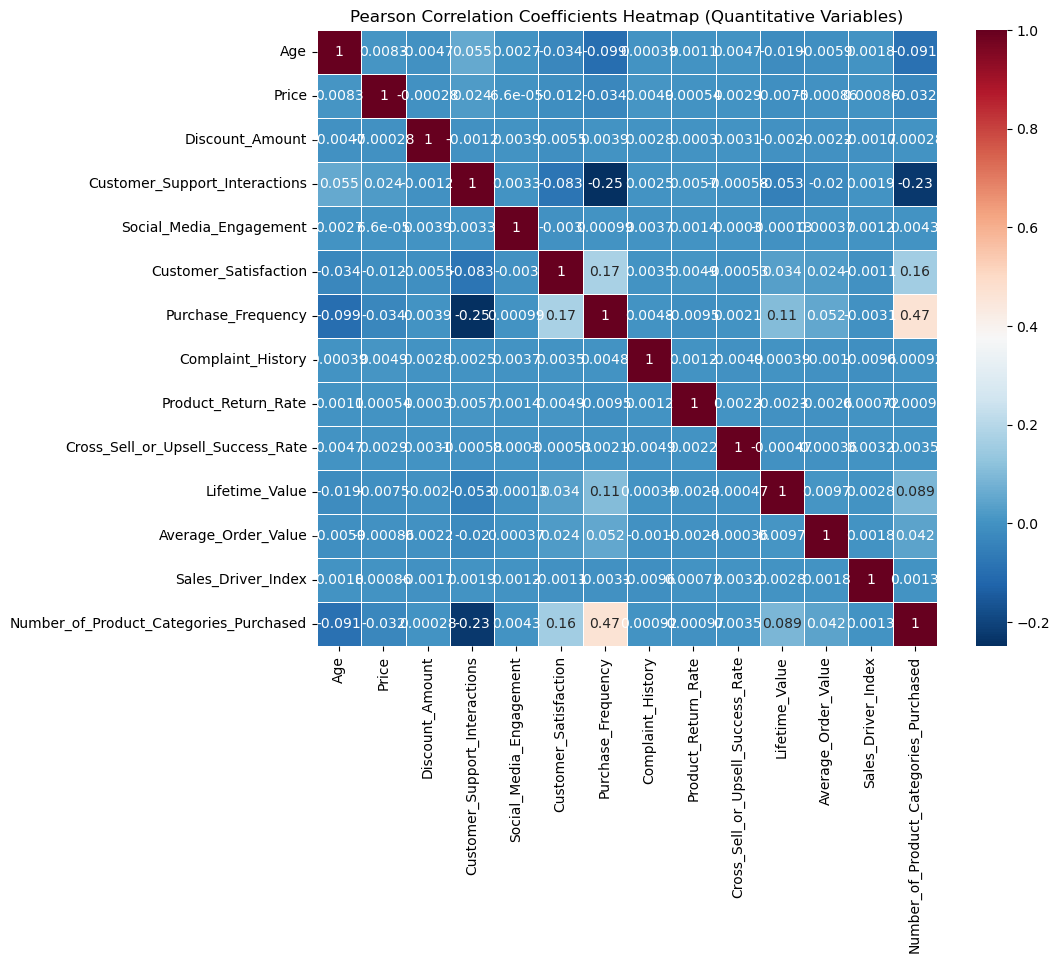

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'quan' is your DataFrame containing quantitative variables
# Calculate Pearson correlation coefficients
pearsoncorr = quan_df.corr(method='pearson')

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',  # Color map
            annot=True,  # Show numeric annotations
            linewidth=0.5)  # Width of lines that divide each cell

plt.title('Pearson Correlation Coefficients Heatmap (Quantitative Variables)')
plt.show()

# Independent sample unpaired T-test

diff group (M,F) , same condtion (Churn)

In [75]:
churn_age = cleaned_df[cleaned_df['Churn'] == 'Yes']['Age']
non_churn_age = cleaned_df[cleaned_df['Churn'] == 'No']['Age']

t_stat, p_val = stats.ttest_ind(churn_age, non_churn_age)
print(f'T-test for age difference: t-statistic = {t_stat}, p-value = {p_val}')

T-test for age difference: t-statistic = 44.61912141907033, p-value = 0.0


In [77]:
churn_price = cleaned_df[cleaned_df['Churn'] == 'Yes']['Price']
non_churn_price = cleaned_df[cleaned_df['Churn'] == 'No']['Price']

t_stat, p_val = stats.ttest_ind(churn_price, non_churn_price)
print(f'T-test for price difference: t-statistic = {t_stat}, p-value = {p_val}')

T-test for price difference: t-statistic = 15.361597672458316, p-value = 3.4321791264282605e-53


# Dependent sample Ppaired T-test

same group(Churn_Yes)-but diffent conditions(Price, Customer_Satisfaction)

In [78]:
Churn1 = df[df["Churn"]=='Yes']['Price']
Churn2= df[df["Churn"]=='Yes']['Customer_Satisfaction']
ttest_ind(Churn1, Churn2)

Ttest_indResult(statistic=379.6256305892193, pvalue=0.0)

In [79]:
Churn3 = df[df["Churn"]=='Yes']['Average_Order_Value']
Churn4= df[df["Churn"]=='Yes']['Lifetime_Value']
ttest_ind(Churn3, Churn4)

Ttest_indResult(statistic=-265.8580735708991, pvalue=0.0)

In [80]:
# Import necessary libraries
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns

# Define the function to get the probability density function (PDF) probability
def get_pdf_probability(cleaned_df, startrange, endrange):
    # Create a distribution plot of the data
    ax = sns.distplot(cleaned_df, kde=True, kde_kws={'color': 'blue'}, color='Green')
    
    # Add vertical lines at the specified start and end range
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    
    # Generate a sample from the dataframe
    sample = cleaned_df
    
    # Calculate parameters: mean and standard deviation of the sample
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the normal distribution with the calculated mean and standard deviation
    dist = norm(sample_mean, sample_std)
    
    # Generate a list of values within the specified range
    values = [value for value in range(startrange, endrange)]
    
    # Calculate the PDF for each value in the range
    probabilites = [dist.pdf(value) for value in values]
    
    # Sum the probabilities to get the area under the curve within the range
    prob = sum(probabilites)
    
    # Print the result
    print("The area between range({}, {}): {}".format(startrange, endrange, sum(probabilites)))
    
    # Return the calculated probability
    return prob

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=370.941, Standard Deviation=163.625
The area between range(287, 515): 0.506951194454005


0.506951194454005

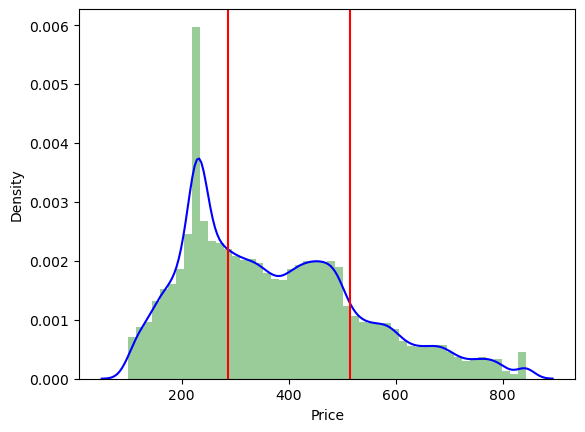

In [81]:
#What is the pdf of price range from 287 to 515
get_pdf_probability(df["Price"], 287, 515)

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=26.771, Standard Deviation=13.152
The area between range(9, 46): 0.8404931025888732


0.8404931025888732

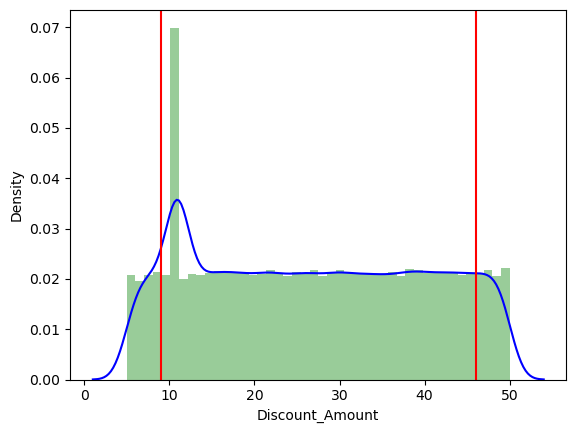

In [84]:
#What is the pdf of discount range from 9 to 46
get_pdf_probability(df["Discount_Amount"], 9, 46)

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=543.212, Standard Deviation=277.279
The area between range(111, 549): 0.44829488416397734


0.44829488416397734

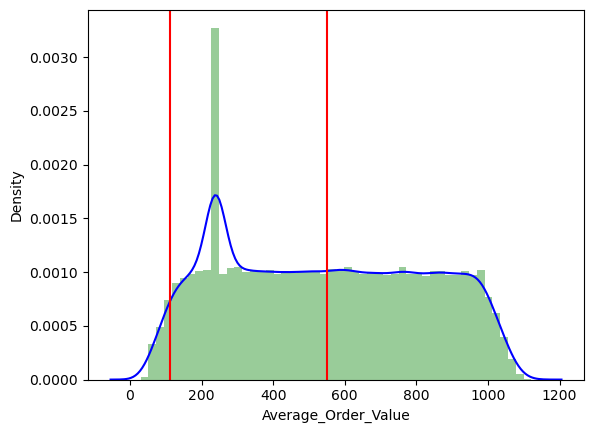

In [87]:
#What is the pdf of discount range from 9 to 46
get_pdf_probability(df["Average_Order_Value"], 111, 549)

In [90]:
# Function to plot a standardized normal distribution graph
def stdNBgraph(cleaned_df):
    # Calculate mean and standard deviation of the input dataframe `df`
    mean = cleaned_df.mean()
    std = cleaned_df.std()
    
    # Create a list `values` containing each value from the dataframe `df`
    values = [i for i in cleaned_df]
    
    # Calculate the z-score for each value in `values`
    z_score = [(j - mean) / std for j in values]
    
    # Plot the distribution of z-scores using seaborn
    import seaborn as sns
    sns.distplot(z_score, kde=True)
    
    # Calculate and print the mean of z-scores
    print(sum(z_score) / len(z_score))

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-8.165030683506572e-15


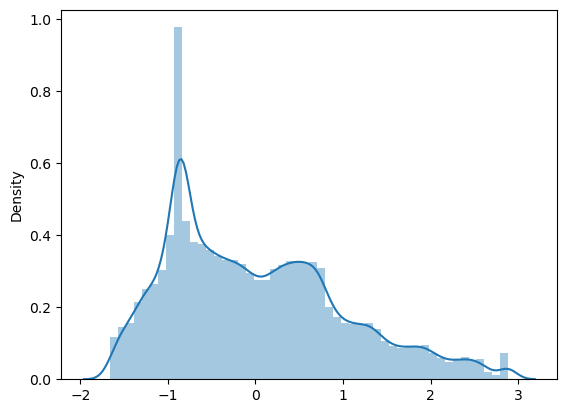

In [91]:
stdNBgraph(df["Price"])

C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-8.301803044530949e-14


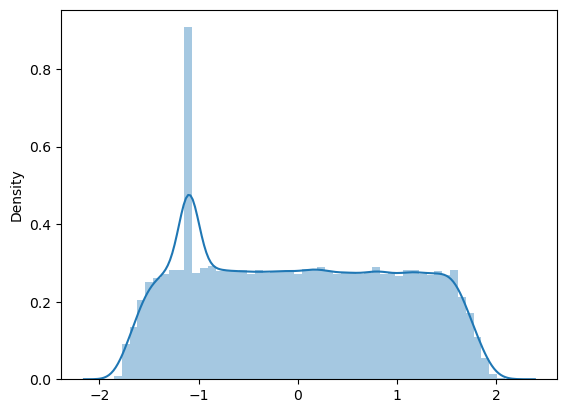

In [93]:
stdNBgraph(df["Average_Order_Value"])

# VIF

In [94]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [95]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(cleaned_df[quan])
vif_result

,variables,VIF
0,Age,8.118290
1,Price,5.511097
2,Discount_Amount,4.765517
3,Customer_Support_Interactions,3.844268
4,Social_Media_Engagement,3.899292
5,Customer_Satisfaction,4.770119
6,Purchase_Frequency,4.797955
7,Complaint_History,3.076051
8,Product_Return_Rate,3.913020
9,Cross_Sell_or_Upsell_Success_Rate,3.971047


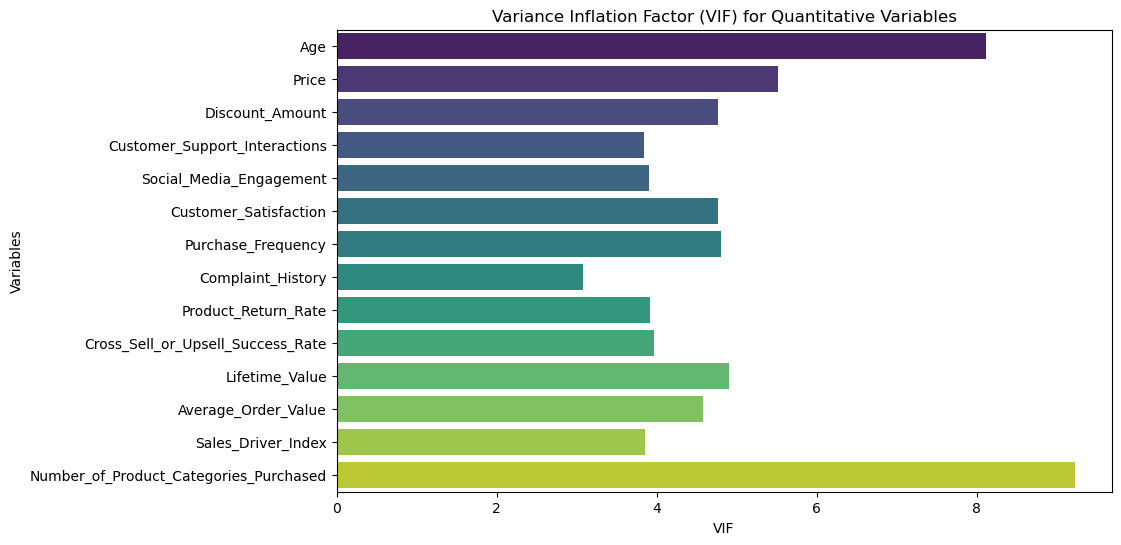

In [96]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='variables', data=vif_result, palette='viridis')

# Adding titles and labels
plt.title('Variance Inflation Factor (VIF) for Quantitative Variables')
plt.xlabel('VIF')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [97]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(cleaned_df[["Price","Number_of_Product_Categories_Purchased"]])
vif_result

,variables,VIF
0,Price,3.557666
1,Number_of_Product_Categories_Purchased,3.557666


In [44]:
cleaned_df1['Churn_Yes']

0        0
1        1
2        1
3        0
4        0
        ..
95097    1
95098    0
95099    1
95100    0
95101    0
Name: Churn_Yes, Length: 95102, dtype: uint8

In [52]:
import pandas as pd

# Assuming cleaned_df is your DataFrame
target_variable = 'Churn_Yes'
predictor_columns = [col for col in cleaned_df.columns if col != target_variable]

# Check for perfect separation
for col in predictor_columns:
    cross_tab = pd.crosstab(cleaned_df[col], cleaned_df[target_variable])
    print(f"Cross-tabulation for {col}:\n{cross_tab}\n")


Cross-tabulation for Age:
Churn_Yes     0    1
Age                 
16.0          0    1
18.0       1220    3
19.0       1256   10
20.0       1191   40
21.0       1264   84
...         ...  ...
75.0          0  225
76.0          0  172
77.0          0   97
78.0          0   37
79.0          0    9

[63 rows x 2 columns]

Cross-tabulation for Date_of_First_Purchase:
Churn_Yes                0   1
Date_of_First_Purchase        
2015-01-05              25   9
2015-01-06              33   9
2015-01-07              19  11
2015-01-08              32  12
2015-01-09              29  15
...                     ..  ..
2020-12-27              36  11
2020-12-28              36  12
2020-12-29              41  13
2020-12-30              34  10
2020-12-31              37  11

[2099 rows x 2 columns]

Cross-tabulation for Last_Purchase_Date:
Churn_Yes            0   1
Last_Purchase_Date        
2021-01-01          64  26
2021-01-02          64  21
2021-01-03          63  19
2021-01-04          68  14


Cross-tabulation for State_TX:
Churn_Yes      0      1
State_TX               
0          62179  23955
1           6481   2487

Cross-tabulation for State_WA:
Churn_Yes      0      1
State_WA               
0          62060  23929
1           6600   2513

Cross-tabulation for Store_Location_Pearle Vision:
Churn_Yes                         0      1
Store_Location_Pearle Vision              
0                             52343  20219
1                             16317   6223

Cross-tabulation for Store_Location_Sunglass Hut:
Churn_Yes                        0      1
Store_Location_Sunglass Hut              
0                            48699  18699
1                            19961   7743

Cross-tabulation for Store_Location_Target Optical:
Churn_Yes                          0      1
Store_Location_Target Optical              
0                              52429  20157
1                              16231   6285

Cross-tabulation for Income_Level_Low:
Churn_Yes             0      1
In

Cross-tabulation for Model_Minimal Baroque:
Churn_Yes                  0      1
Model_Minimal Baroque              
0                      67341  25901
1                       1319    541

Cross-tabulation for Model_OV1136:
Churn_Yes         0      1
Model_OV1136              
0             67354  25939
1              1306    503

Cross-tabulation for Model_OV1141:
Churn_Yes         0      1
Model_OV1141              
0             67349  25913
1              1311    529

Cross-tabulation for Model_OV1154:
Churn_Yes         0      1
Model_OV1154              
0             67318  25966
1              1342    476

Cross-tabulation for Model_OV518:
Churn_Yes        0      1
Model_OV518              
0            67314  25909
1             1346    533

Cross-tabulation for Model_OV520:
Churn_Yes        0      1
Model_OV520              
0            67346  25936
1             1314    506

Cross-tabulation for Model_Radar:
Churn_Yes        0      1
Model_Radar              
0            67

In [62]:
cleaned_df[quan]

,Age,Price,Discount_Amount,Customer_Support_Interactions,Social_Media_Engagement,Customer_Satisfaction,Purchase_Frequency,Complaint_History,Product_Return_Rate,Cross_Sell_or_Upsell_Success_Rate,Lifetime_Value,Average_Order_Value,Sales_Driver_Index,Number_of_Product_Categories_Purchased
0,62.0,214.690000,35.12,8.0,80.0,4.590000,10.0,5.0,0.46,0.27,1738.968150,233.902744,0.51,3.0
1,21.0,314.772739,29.10,2.0,60.0,5.853082,4.0,9.0,0.55,0.79,9799.820000,833.200000,0.74,2.0
2,28.0,232.969400,33.52,9.0,29.0,1.131831,4.0,0.0,0.12,0.03,7027.470000,727.390000,0.94,1.0
3,21.0,457.880000,8.15,4.0,99.0,9.570000,13.0,1.0,0.59,0.01,6900.180000,772.635501,0.99,2.0
4,57.0,745.030000,35.92,5.0,27.0,6.570000,18.0,1.0,0.86,0.74,10923.306090,465.561789,0.68,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,41.0,230.500000,35.74,8.0,47.0,8.225604,4.0,7.0,0.81,0.80,9446.040000,255.330000,0.10,2.0
95098,56.0,398.070000,30.94,9.0,25.0,6.110000,10.0,6.0,0.61,0.12,11065.039920,314.938230,0.69,3.0
95099,31.0,526.098494,47.40,7.0,34.0,8.148891,4.0,3.0,0.96,0.84,6468.370000,239.310000,0.31,2.0
95100,26.0,248.540000,43.08,9.0,8.0,3.470000,16.0,6.0,0.54,0.18,2136.218717,685.872736,0.77,3.0


In [69]:

numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
X=cleaned_df[numerical_cols]

In [68]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming cleaned_df is your DataFrame and target_variable is defined
target_variable = 'Churn_Yes'
predictor_columns = [col for col in cleaned_df[numerical_cols] if col != target_variable]

# Ensure all predictor variables are numeric
cleaned_df[predictor_columns] = cleaned_df[predictor_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the mean of each column
cleaned_df = cleaned_df.fillna(cleaned_df.mean())

# Define predictors
X = cleaned_df[predictor_columns]

# Add a constant to the predictors (intercept)
X = sm.add_constant(X)

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF
vif = calculate_vif(X)
print(vif)

# Remove predictors with high VIF (e.g., VIF > 10)
high_vif_columns = vif[vif['VIF'] > 10]['variables']
X = X.drop(columns=high_vif_columns)

# Recalculate VIF after removing high VIF columns (optional, for verification)
vif = calculate_vif(X)
print(vif)


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                 variables       VIF
0                                    const  0.000000
1                                      Age  0.998426
2                   Date_of_First_Purchase  0.813319
3                       Last_Purchase_Date  0.187282
4                                    Price  0.999021
5                          Discount_Amount  0.999370
6            Customer_Support_Interactions  1.002052
7                  Social_Media_Engagement  0.999375
8                    Customer_Satisfaction  1.000354
9                       Purchase_Frequency  1.010685
10                       Complaint_History  0.999674
11                     Product_Return_Rate  0.999440
12       Cross_Sell_or_Upsell_Success_Rate  0.999365
13                          Lifetime_Value  0.999185
14                     Average_Order_Value  0.999023
15                      Sales_Driver_Index  0.999170
16  Number_of_Product_Categories_Purchased  1.006234


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                 variables       VIF
0                                    const  0.000000
1                                      Age  0.998426
2                   Date_of_First_Purchase  0.813319
3                       Last_Purchase_Date  0.187282
4                                    Price  0.999021
5                          Discount_Amount  0.999370
6            Customer_Support_Interactions  1.002052
7                  Social_Media_Engagement  0.999375
8                    Customer_Satisfaction  1.000354
9                       Purchase_Frequency  1.010685
10                       Complaint_History  0.999674
11                     Product_Return_Rate  0.999440
12       Cross_Sell_or_Upsell_Success_Rate  0.999365
13                          Lifetime_Value  0.999185
14                     Average_Order_Value  0.999023
15                      Sales_Driver_Index  0.999170
16  Number_of_Product_Categories_Purchased  1.006234


In [70]:
# Define the target variable and predictors again after removing high VIF columns
y = cleaned_df[target_variable]

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 15


C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                95102
Model:                          Logit   Df Residuals:                    95086
Method:                           MLE   Df Model:                           15
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                     inf
Time:                        21:07:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Age                                        0.0242      0.002     10.441      0.000       0.020       0.029
Date_of_First_Purchase                  4.035e-

C:\Users\AB92922\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Variables such as Purchase_Frequency and Number_of_Product_Categories_Purchased have a strong negative effect on churn, meaning higher values in these variables reduce the likelihood of churn.

Variables like Customer_Support_Interactions and Complaint_History have a positive effect on churn, indicating higher values in these variables increase the likelihood of churn.

Some variables, such as Discount_Amount and Social_Media_Engagement, are not significant predictors of churn.